In [63]:
import numpy as np
import matplotlib.cm as cmap
import os.path
import scipy
import scipy.signal as signal
import pickle as pickle
from brian2 import *
import brian2
from brian2tools import *
from PIL import Image
from struct import unpack
import matplotlib.pyplot as plt
import math
import time

In [64]:
stimuli_file = './pic_24.tif'
fig_num = 1

In [65]:
def tune_stimuli(data):
    data = (data - data.min()) / (data.max() - data.min())
    q95 = np.percentile(data, 95)
    data = np.where((data > q95), q95, data)
    data = np.exp(data*15)
    data = (data - data.min()) / (data.max() - data.min())
    data *= 20
    return data

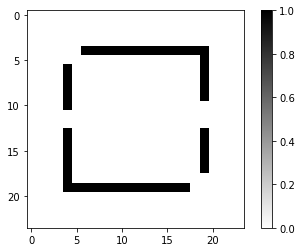

In [66]:
img = Image.open(stimuli_file)
img.load()
img_arr = np.asarray(img, dtype="int32")
stimuli = np.absolute(img_arr)/255
img.close()

# fig = figure(fig_num, figsize = (10, 10))
im2 = imshow(stimuli, vmin = np.min(stimuli), vmax = np.max(stimuli) , cmap = cmap.get_cmap('gray_r'))
colorbar(im2)
fig_num += 1

In [67]:
def gaussian2D(x, y, sigma):
    return (1.0/(1*math.pi*(sigma**2)))*math.exp(-(1.0/((sigma**2)))*(x**2 + y**2))
#     return (1.0/(1*math.pi*(sigma**2)))*math.exp(-(1.0/(2*math.pi*(sigma**2)))*(x**2 + y**2))

In [68]:
def plotFilter(fun):
    g = receptiveFieldMatrix(fun) 
    im = imshow(g, cmap=cmap.get_cmap('gray_r'))
    colorbar(im)

In [69]:
def mexicanHat(x,y,sigma1,sigma2): 
    return gaussian2D(x,y,sigma1) - gaussian2D(x,y,sigma2)

In [70]:
def receptiveFieldMatrix(func):
    h = 5
    g = np.zeros((h,h))
    for xi in range(0,h):
        for yi in range(0,h):
            x = xi-int(h/2)
            y = yi-int(h/2)
            g[xi, yi] = func(x,y);
    return g

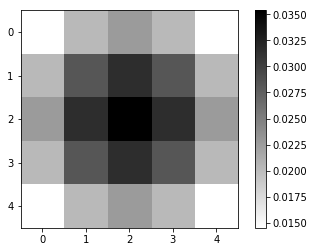

In [71]:
plotFilter(lambda x,y:gaussian2D(x,y,3))

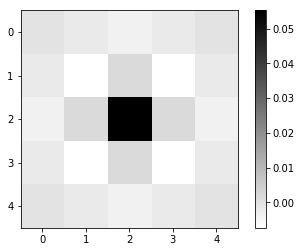

In [72]:
plotFilter(lambda x,y: mexicanHat(x,y,1,1.1))

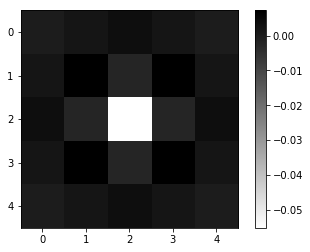

In [73]:
plotFilter(lambda x,y: mexicanHat(x,y,1.1,1))

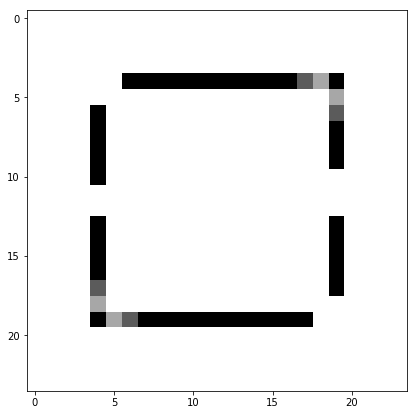

In [74]:
Img_barHat = signal.convolve(stimuli, receptiveFieldMatrix(lambda x,y:mexicanHat(x,y,1,1.1)), mode='same')
data = tune_stimuli(Img_barHat)
fig = figure(fig_num, figsize = (7, 7))
imgplot = imshow(data, cmap=cmap.get_cmap('gray_r'))
fig_num += 1

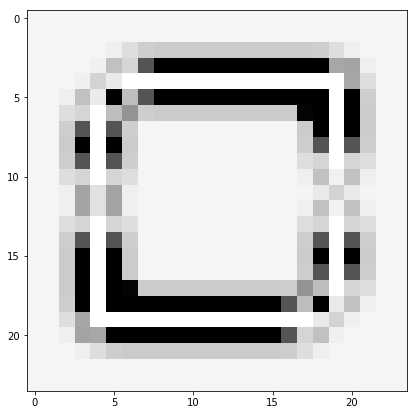

In [75]:
Img_barHat = signal.convolve(stimuli, receptiveFieldMatrix(lambda x,y:mexicanHat(x,y,1.1,1)), mode='same')
data = tune_stimuli(Img_barHat)
fig = figure(fig_num, figsize = (7, 7))
imgplot = imshow(data, cmap=cmap.get_cmap('gray_r'))
fig_num += 1

In [76]:
receptiveFieldMatrix(lambda x,y:mexicanHat(x,y,1,1.1))

array([[-0.00024697, -0.00207667, -0.00381669, -0.00207667, -0.00024697],
       [-0.00207667, -0.00729732,  0.00198154, -0.00729732, -0.00207667],
       [-0.00381669,  0.00198154,  0.05524386,  0.00198154, -0.00381669],
       [-0.00207667, -0.00729732,  0.00198154, -0.00729732, -0.00207667],
       [-0.00024697, -0.00207667, -0.00381669, -0.00207667, -0.00024697]])